# Extra credit

Assume now that you do not know the number of states of the HMM, but you know that the number of  objects  is  3,  i.e., 𝑣=1,2,3.  Train  different  HMMs  each  with  a  different  number  of  states, starting with an HMM with two states, and for each HMM calculate the likelihood, AIC, and BIC. Plot these three quantities as a function of the number of states. Keep increasing the number of states until you begin to discern a pattern in each of the three plots. Select the best HMM. Discuss your results.Note that the number of parameters increases as the number of states increases. A rule of thumb is that for each parameter, you need at least 10 observations. As you increase the number of states, 
you may require more than 1000 observations. In this case, simply generate additional observations as described above. 

In [1]:
from hmmlearn import hmm
import numpy as np
import matplotlib.pyplot as plt

Create a temporary model to generate a list of dynamic observations for the values to be fitted

In [2]:
def create_model(states = 4):
    P = np.random.random((states, states))
    for i in range(states):
        P[i] = P[i]/sum(P[i])   
    B = np.random.random((states, 3))
    for i in range(states):
        B[i] = B[i]/sum(B[i])
    pi = [1]
    ec_model = hmm.MultinomialHMM(n_components=states, algorithm='viterbi', random_state=200314659, n_iter=10, tol=0.01)
    ec_model.startprob_ = np.array(pi + [0]*(states-1))
    ec_model.transmat_ = np.array(P)
    ec_model.emissionprob_ = np.array(B)
    return ec_model

In [3]:
ec_model = create_model()

In [4]:

def bic_score(LL, k, X):
    return - 2*LL(X) + np.log(len(X))*k

def aic_score(LL, k, X):
    return -2/len(X)*LL(X) + 2*k/len(X)

bic = []
aic = []
mle = []
comp = -1
for num in range(1,25):
    model = hmm.MultinomialHMM(n_components=num, algorithm='viterbi', random_state=200314659, n_iter=10, tol=0.01)
    model_obs, _ = ec_model.sample(40*num)
    model.fit(model_obs)
    mle_score = np.exp(model.score(model_obs))
    n_features = model.n_features
    free_parameters = 2*(num*n_features) + num*(num-1) + (num-1)
    bic_val = bic_score(model.score, free_parameters, model_obs)
    bic.append(bic_val)
    aic_val = aic_score(model.score, free_parameters, model_obs)
    aic.append(aic_val)
    mle.append(mle_score)
    if mle_score == 0.0 and comp != mle_score:
        comp = num

print("components = ", mle.index(0))

components =  18


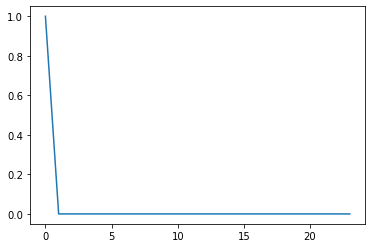

In [5]:
plt.plot(mle/sum(mle))


We notice that MLE decreases closer to zero but gradually becomes zero when the number of components are 17

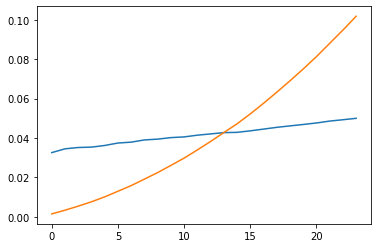

In [6]:
plt.plot(aic/sum(aic))
plt.plot(bic/sum(bic))

AIC and BIC are normalized and plotted for analysis

In [7]:
print("MLE: ", mle)
print("AIC: ", aic)
print("BIC ", bic)

MLE:  [6.635981121000981e-18, 4.047056435040627e-36, 1.6840513037557615e-53, 1.1057898556773402e-69, 3.5757708536861206e-87, 2.6462223948412495e-106, 1.1644117332890626e-122, 5.3516237561612305e-142, 6.090120128550802e-158, 1.1137424083534285e-175, 1.03883127267385e-190, 3.937860383408796e-209, 7.126879044970018e-226, 1.1866316433426473e-242, 1.2277101303933109e-254, 4.83763969526898e-272, 1.040228914720457e-290, 1.225994106045643e-309, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
AIC:  [2.2777012573252615, 2.412376838427041, 2.4585967924652534, 2.4722226441931303, 2.530507223141707, 2.6175073895479946, 2.6483083238268037, 2.7268105199029415, 2.7555654271443886, 2.809223326952358, 2.8338775971086387, 2.8952901954576955, 2.940078298460228, 2.9859088348672707, 2.9955048762293175, 3.049145994871458, 3.1109124593206836, 3.1730417825142347, 3.2244300303982465, 3.2749651128191695, 3.3277784346163837, 3.3951544495177925, 3.442550843888604, 3.4930042626173616]
BIC  [101.24132701769409, 228.72054659427153, 36

From the analysis, we notice that as the number of components increases, the mle decreases and becomes 0 and the increase in aic is larger than bic when normalized and plotted together 

It is also mentioned in the hmmlearn documentation that the Baum-Welch Algorithm is ideal for the parameter estimation in Hidden Markov Models

Finally, we can consider the stage when the MLE reaches 0 as on of the stopping criterion apart from the point when the AIC and BIC curves stabilize as points when the best model is created

Ref:
The free_parameters is determined by referring to https://stats.stackexchange.com/questions/12341/number-of-parameters-in-markov-model